In [20]:
import deepchem as dc
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [24]:
channel = "0072593"

In [25]:
train_embeddings_df = pd.read_csv(f"data-tsne/antioxidant/{channel}/train-embeddings-{channel}.csv")
targets = train_embeddings_df["target"].values
train_embeddings = train_embeddings_df.drop("target", axis=1).values

test_embeddings_df = pd.read_csv(f"data-tsne/antioxidant/{channel}/test-embeddings-{channel}.csv")
test_embeddings = test_embeddings_df.values

test_tophits_embeddings_df = pd.read_csv(f"data-tsne/antioxidant/{channel}/test-tophits-embeddings-{channel}.csv")
test_tophits_embeddings = test_tophits_embeddings_df.values

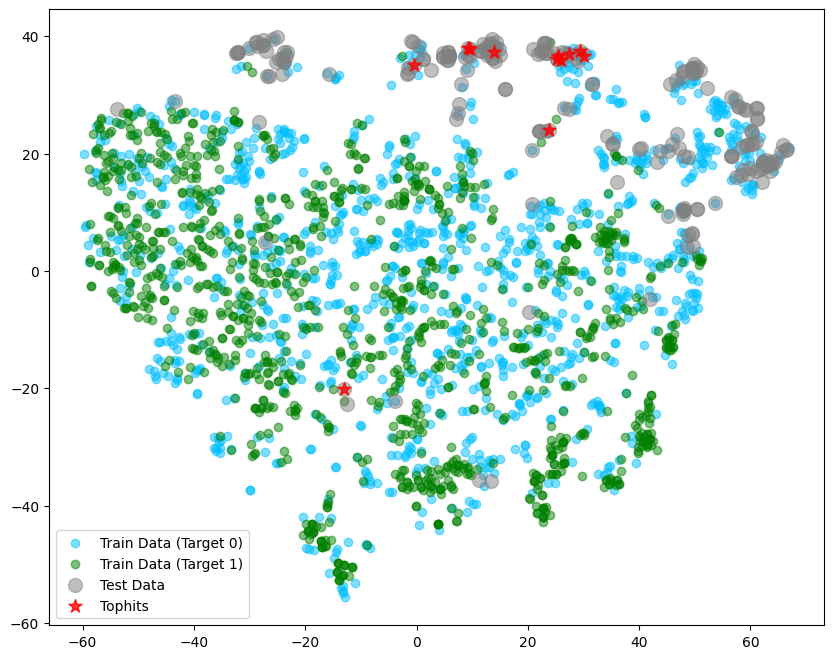

: 

In [26]:
all_embeddings = np.vstack([train_embeddings, test_embeddings, test_tophits_embeddings])

tsne_embeddings = TSNE(n_components=2).fit_transform(all_embeddings)

plt.figure(figsize=(10,8))

plt.scatter(tsne_embeddings[:len(train_embeddings), 0][targets == 0], 
            tsne_embeddings[:len(train_embeddings), 1][targets == 0], 
            alpha=0.5, label='Train Data (Target 0)', c='#00BFFF')

plt.scatter(tsne_embeddings[:len(train_embeddings), 0][targets == 1], 
            tsne_embeddings[:len(train_embeddings), 1][targets == 1], 
            alpha=0.5, label='Train Data (Target 1)', c='green')

plt.scatter(tsne_embeddings[len(train_embeddings):len(train_embeddings)+len(test_embeddings), 0], 
            tsne_embeddings[len(train_embeddings):len(train_embeddings)+len(test_embeddings), 1], 
            alpha=0.5, label='Test Data', c='gray', s=100)

plt.scatter(tsne_embeddings[-len(test_tophits_embeddings):, 0], 
            tsne_embeddings[-len(test_tophits_embeddings):, 1], 
            alpha=0.8, label='Tophits', c='red', s=100, marker='*')

plt.legend()
plt.show()